## Assignment#1
#### Farheen Latif(20L- 1363) & Muhammad Hassan(20L-1343)
#### BDS-8A

## Step 1: Load and Convert an Image to Grayscale

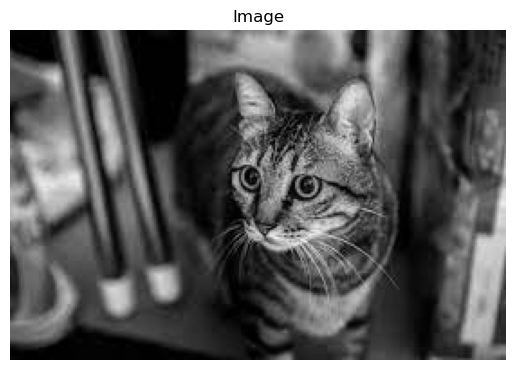

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load an image
image_path = 'images.jpg'  
image = cv2.imread(image_path)
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use matplotlib to display the image
plt.imshow(gray_image, cmap='gray')
plt.title("Image")
plt.axis('off')  # Hide the axis
plt.show()

## Step 2: Cut Out a Portion of the Image

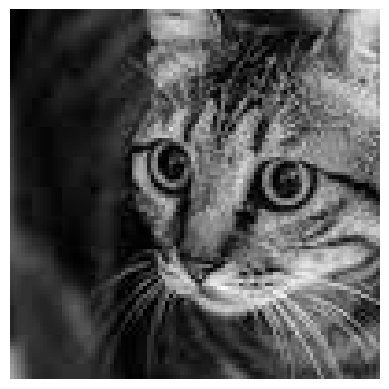

In [32]:
# Assume you've identified a face at these coordinates
x, y = 90, 40  # Top-left corner of the face
width, height = 100, 100  # Width and height of the face area

# Cut out the face from the grayscale image
face = gray_image[y:y+height, x:x+width]

# Display the cut-out face using matplotlib
plt.imshow(face, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()


## Step 3 & 4: Overlay Function and Application

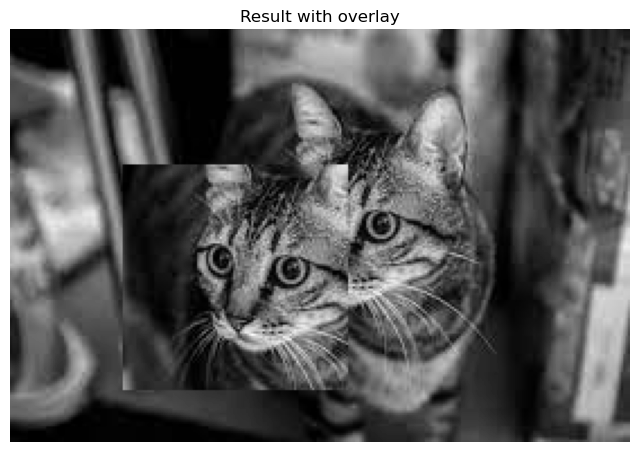

In [43]:
# Corrected function call with bounds checking
def overlay_image(large_image, small_image, coordinates):
    x, y = coordinates
    if x+small_image.shape[1] > large_image.shape[1] or y+small_image.shape[0] > large_image.shape[0]:
        raise ValueError("The overlay image extends beyond the bounds of the large image.")
    large_image[y:y+small_image.shape[0], x:x+small_image.shape[1]] = small_image
    return large_image

try:
    # Assuming 'gray_image' is your large image and 'face' is the small image you want to overlay.
    # Coordinates should be set such that the small image does not go out of bounds of the large image.
    result_image = overlay_image(gray_image, face, (50, 60))
    
    # Display the result using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(result_image, cmap='gray')
    plt.title('Result with overlay')
    plt.axis('off')  # Hide axis
    plt.show()

except ValueError as e:
    print(e)

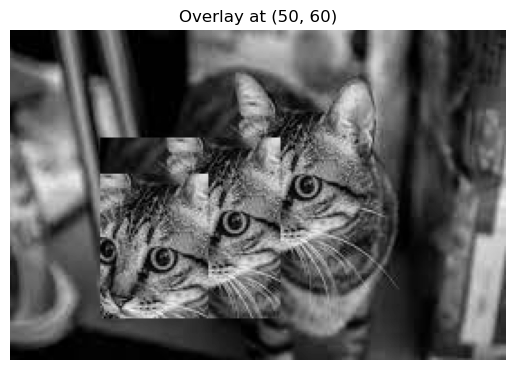

The overlay image extends beyond the bounds of the large image.
The overlay image extends beyond the bounds of the large image.


In [44]:
import cv2
import matplotlib.pyplot as plt

def overlay_images(large_image, small_image, coordinates):
    x, y = coordinates
    if x + small_image.shape[1] > large_image.shape[1] or y + small_image.shape[0] > large_image.shape[0]:
        raise ValueError("The overlay image extends beyond the bounds of the large image.")
    large_image[y:y + small_image.shape[0], x:x + small_image.shape[1]] = small_image
    return large_image

# Example usage
# Assuming 'original_image' is the original grayscale image and 'face' is the cut-out portion
# Coordinates list for placing the cut-out at three different locations
coordinates_list = [(50, 60), (150, 200), (300, 400)]
for coords in coordinates_list:
    try:
        result = overlay_images(gray_image.copy(), face, coords)
        plt.imshow(result, cmap='gray')
        plt.title(f'Overlay at {coords}')
        plt.axis('off')
        plt.show()
    except ValueError as e:
        print(e)


C:\Users\Farheen Latif\AppData\Local\Temp\ipykernel_9560\2955468460.py:6: RuntimeWarning: overflow encountered in scalar add
  large_image[y + i, x + j] = (large_image[y + i, x + j] + small_image[i, j]) // 2


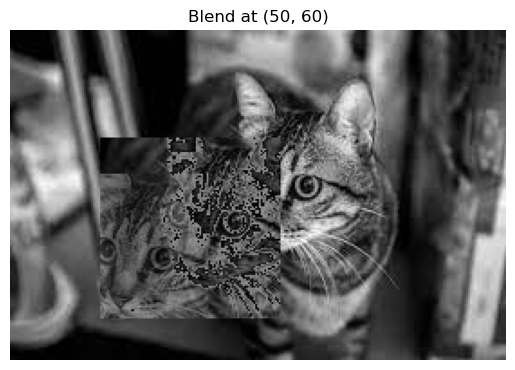

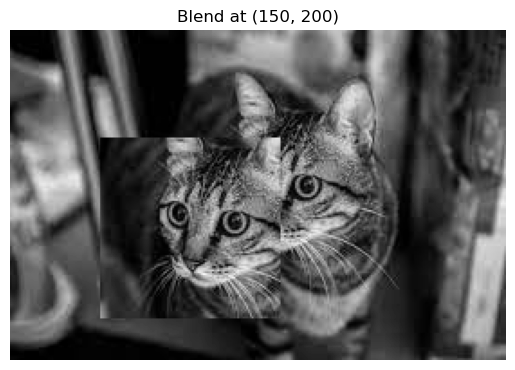

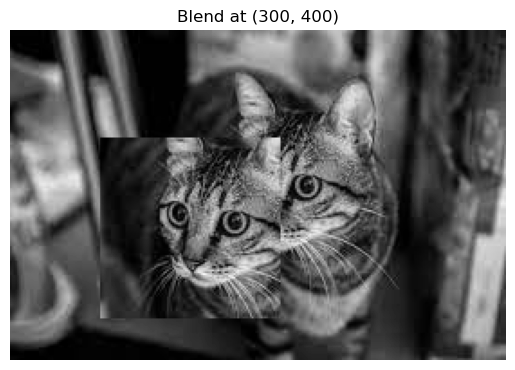

In [45]:
def blend_images(large_image, small_image, coordinates):
    x, y = coordinates
    for i in range(small_image.shape[0]):
        for j in range(small_image.shape[1]):
            if y + i < large_image.shape[0] and x + j < large_image.shape[1]:
                large_image[y + i, x + j] = (large_image[y + i, x + j] + small_image[i, j]) // 2
    return large_image

# Example usage for blending the images
# Coordinates list for blending the cut-out at three different locations
for coords in coordinates_list:
    try:
        blended_result = blend_images(gray_image.copy(), face, coords)
        plt.imshow(blended_result, cmap='gray')
        plt.title(f'Blend at {coords}')
        plt.axis('off')
        plt.show()
    except ValueError as e:
        print(e)

## Step 5: Function to Blend Images

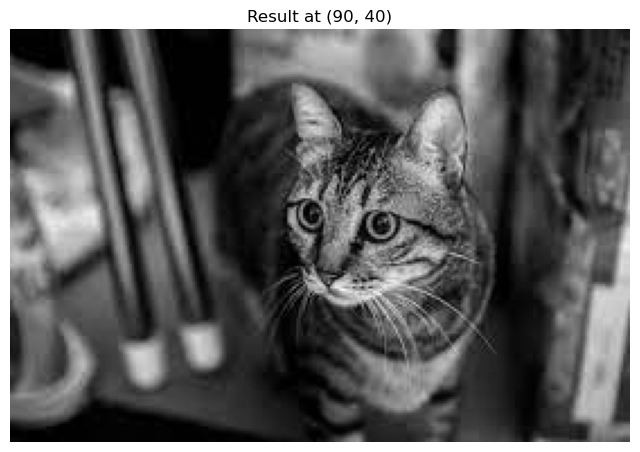

ValueError: could not broadcast input array from shape (100,100) into shape (0,75)

In [42]:
# Assuming 'overlay_image' is your predefined function and 'face' is the cropped face image
# Example coordinates based on your image
coordinates_list = [(90, 40), (200, 200), (350, 350)]

# Assuming 'gray_image' is your grayscale image
for coordinates in coordinates_list:
    # Create a copy of the gray image for overlaying
    temp_image = gray_image.copy()
    result_image = overlay_image(temp_image, face, coordinates)
    
    # Display the result using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(result_image, cmap='gray')
    plt.title(f'Result at {coordinates}')
    plt.axis('off')  # Hide the axis
    plt.show()
